<a href="https://colab.research.google.com/github/crzysab/Data-Science-Real-Projects-in-Python/blob/main/Predicting_Covid_19_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Covid-19 Cases using Facebook Prophet**

___

**Perform Data Pre-Processing on data**

In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd
from google.colab import drive

In [3]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/dataset/covid_19_clean_complete.csv")

Mounted at /content/drive


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [8]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
df['Date'].nunique()

188

In [11]:
total = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [12]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


**Applying Facebook Prophet Model on Data**

In [13]:
df_prophet = total.rename(columns={'Date':'ds','Confirmed':'y'})

In [14]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [15]:
m = Prophet()

In [16]:
model = m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Create Future Data for Prediction Purpose**

In [17]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [18]:
future_global = model.make_future_dataframe(periods=30, freq='D')

In [19]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [21]:
df_prophet.shape

(188, 5)

In [20]:
future_global.shape

(218, 1)

In [24]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [25]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


**Visualising the predictions**

Doing Predictions on Future Data

In [26]:
prediction = model.predict(future_global)

In [27]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.304403e+05,8.402977e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.181567e+05,9.891557e+04,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-1.056500e+05,1.086105e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.100420e+04,1.178576e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.755200e+04,1.149058e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.109161e+07,2.183406e+07,2.108332e+07,2.179532e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.128068e+07,2.204163e+07,2.126470e+07,2.201811e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.146528e+07,2.228313e+07,2.145301e+07,2.224470e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.160332e+07,2.246506e+07,2.163122e+07,2.247390e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [28]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.109161e+07,2.183406e+07
214,2020-08-23,2.165304e+07,2.128068e+07,2.204163e+07
215,2020-08-24,2.184773e+07,2.146528e+07,2.228313e+07
216,2020-08-25,2.203715e+07,2.160332e+07,2.246506e+07
217,2020-08-26,2.224712e+07,2.182265e+07,2.270991e+07


Visualising the predictions

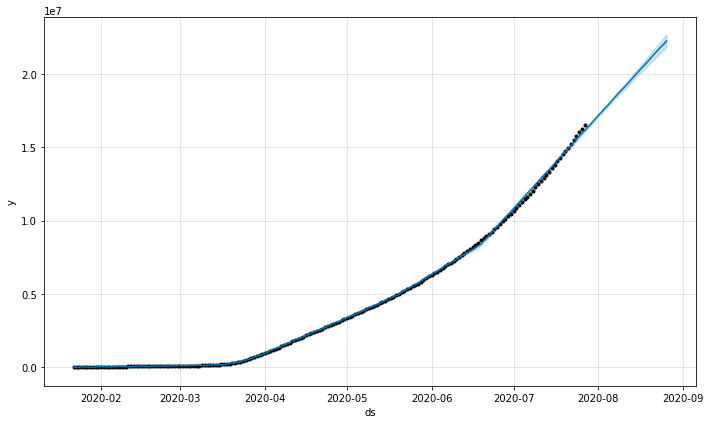

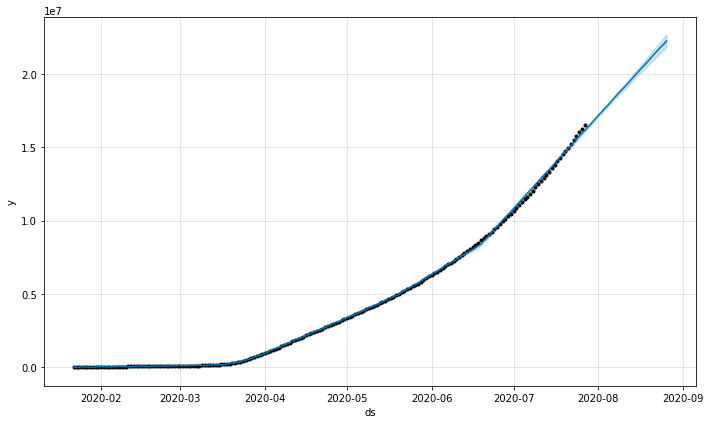

In [29]:
model.plot(prediction)

**How to Cross Validating Time Series model using Prophet**

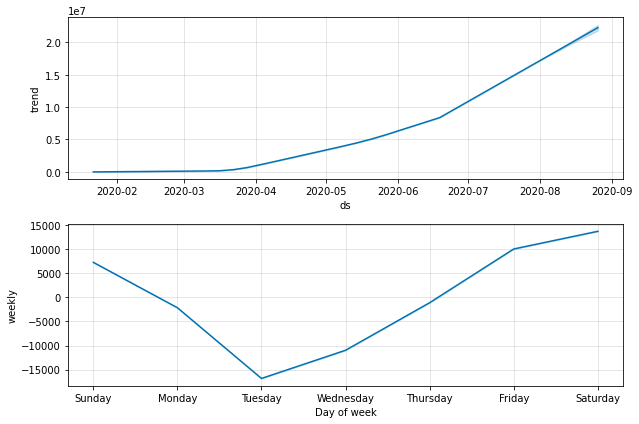

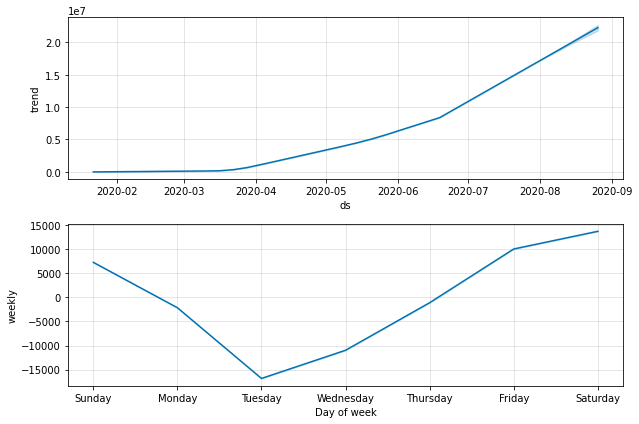

In [30]:
model.plot_components(prediction)

In [31]:
from fbprophet.plot import add_changepoints_to_plot

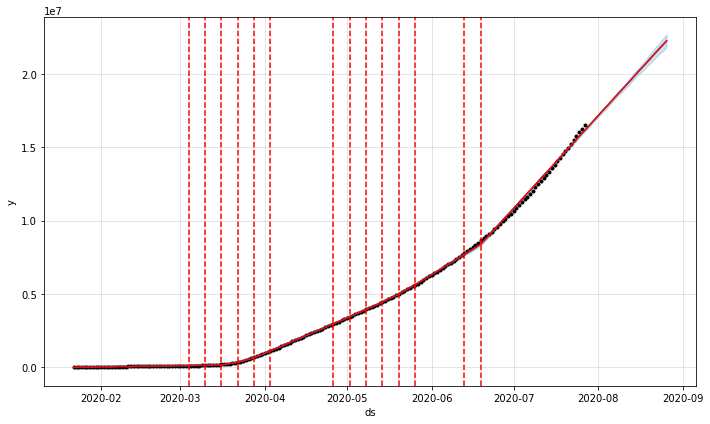

In [32]:
fig = model.plot(prediction)
a= add_changepoints_to_plot(fig.gca(),model,prediction)

In [33]:
from fbprophet.diagnostics import cross_validation

In [34]:
df_cv = cross_validation(model, horizon='30 days', period='15 days', initial='90 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
df_cv.shape

(150, 6)

**Obtain Performance Metrics for your model**

In [37]:
from fbprophet.diagnostics import performance_metrics

In [38]:
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


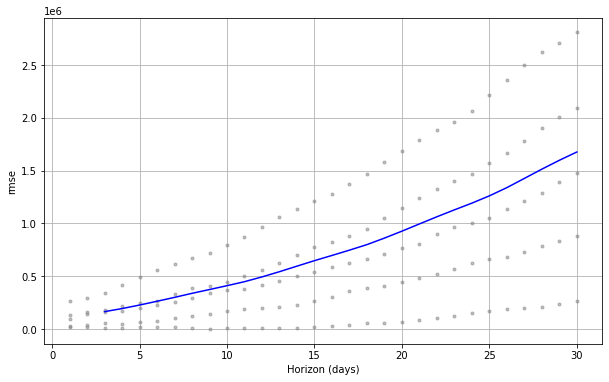

In [39]:
from fbprophet.plot import plot_cross_validation_metric
df_performance = plot_cross_validation_metric(df_cv, metric='rmse')

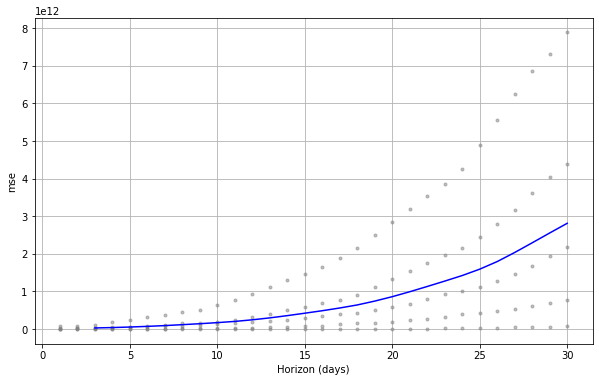

In [40]:
df_performance = plot_cross_validation_metric(df_cv, metric='mse')

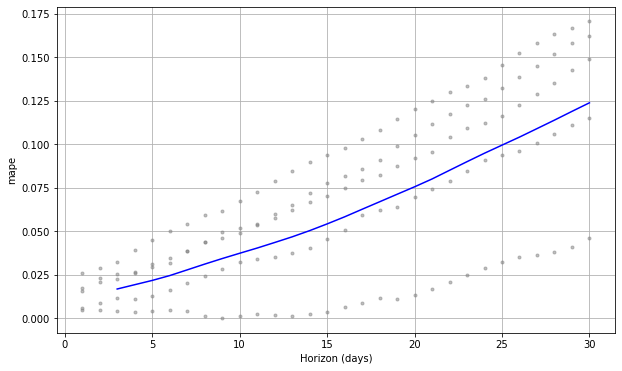

In [41]:
df_performance = plot_cross_validation_metric(df_cv, metric='mape')